Send this ipynb file with your code (solution) to econometrics.methods@gmail.com

In the subject of the e-mail, copy and paste only the title of this file without the extension ".ipynb"

Write the name of the members of your group in the e-mail, and not here.

Only one student will send me the solution. This student is responsible to copy other members of the group in the e-mail. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn import cluster
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set()

## Vanilla Example

Let us begin with a toy dataset with three groups that are completely separated with the variables given. There are the same number of points per group and the same variance within each group.

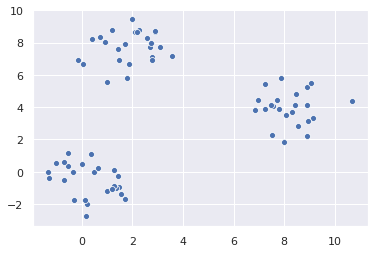

In [2]:
np.random.seed(1337)

c1 = np.random.randn(25, 2)
c2 = np.array([2, 8]) + np.random.randn(25, 2)
c3 = np.array([8, 4]) + np.random.randn(25, 2)

x1 = np.vstack((c1, c2, c3))

sns.scatterplot(x=x1[:, 0], y=x1[:, 1]);

Running the K-Means algorithm, we can see that it is able to accurately pick out the three initial clusters. 

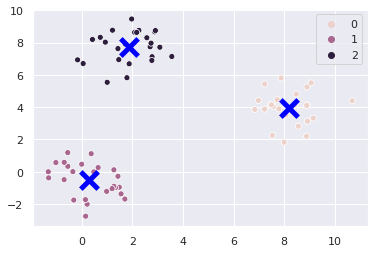

In [3]:
kmeans = cluster.KMeans(n_clusters=3, random_state=42).fit(x1)
sns.scatterplot(x=x1[:, 0], y=x1[:, 1], hue=kmeans.labels_)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='blue', marker='x', s=300, linewidth=5);

## Question 1

In the previous example, the K-Means algorithm was able to accurately find the three initial clusters. However, changing the starting centers for K-Means can change the final clusters that K-Means gives us. Change the initial centers to the points `[0, 1]`, `[1, 1]`, and `[2, 2]`; and fit a [`cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) object called `kmeans_q1` on the toy dataset from the previous example. Keep the `random_state` parameter as 42 and the `n_clusters` parameter as 3.

**Hint:** You will need to change the `init` and `n_init` parameters in `cluster.KMeans`.

<!--
BEGIN QUESTION
name: q1
-->

In [0]:
kmeans_q1 = ...

Running the K-Means algorithm with these centers gives us a different result from before, and this particular run of K-Means was unable to accurately find the three initial clusters.

In [5]:
sns.scatterplot(x=x1[:, 0], y=x1[:, 1], hue=kmeans_q1.labels_)
sns.scatterplot(kmeans_q1.cluster_centers_[:, 0], kmeans_q1.cluster_centers_[:, 1], color='blue', marker='x', s=300, linewidth=5);

AttributeError: ignored

## Question 2

Sometimes, K-Means will have a difficult time finding the "correct" clusters even with ideal starting centers. For example, consider the data below. There are two groups of different sizes in two different senses. The smaller group has both smaller variability and is less numerous, and the larger of the two groups is more diffuse and populated.

In [0]:
np.random.seed(1337)

c1 = 0.5 * np.random.randn(25, 2)
c2 = np.array([10, 10]) + 3*np.random.randn(475, 2)

x2 = np.vstack((c1, c2))

sns.scatterplot(x=x2[:, 0], y=x2[:, 1]);

### Question 2a

Fit a `cluster.KMeans` object called `kmeans_q2a` on the dataset above with two clusters and a `random_state` parameter of 42.

<!--
BEGIN QUESTION
name: q2a
-->

In [0]:
kmeans_q2a = ...

(For notational simplicity we will call the initial cluster on the bottom left $A$ and the initial cluster on the top right $B$. We will call the bottom left cluster found by K-Means as cluster $a$ and the top right cluster found by K-Means as cluster $b$.) 

As seen below, K-Means is unable to find the two intial clusters because cluster $a$ includes points from cluster $B$. Recall that K-Means attempts to minimize distortion, so it makes sense that points in the bottom left of cluster $B$ would prefer to be in cluster $a$ rather than cluster $b$. If these points were in cluster $b$ instead, then the resulting cluster assignments would have a larger distortion.

In [0]:
sns.scatterplot(x=x2[:, 0], y=x2[:, 1], hue=kmeans_q2a.labels_)
sns.scatterplot(kmeans_q2a.cluster_centers_[:, 0], kmeans_q2a.cluster_centers_[:, 1], color='red', marker='x', s=300, linewidth=5);

### Question 2b

It turns out agglomerative clustering works better for this task, as long as we choose the right definition of distance between two clusters. Recall that agglomerative clustering starts with every data point in its own cluster and iteratively joins the two closest clusters until there are $K$ clusters remaining. However, the "distance" between two clusters is ambiguous. 

Our choice of definition for the distance is sometimes called the "linkage criterion." We will discuss three linkage criteria, each of which is a different definition of "distance" between two clusters:

- Complete linkage considers the distance between two clusters as the **maximum** distance between a point in the first cluster and a point in the second.
- Single linkage considers the distance between two clusters as the **minimum** distance between a point in the first cluster and a point in the second.
- Average linkage considers the distance between two clusters as the **average** distance between a point in the first cluster and a point in the second.

Using the **complete linkage criterion**, fit a [`cluster.AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) object called `aggc_q2b` on the dataset above with two clusters.

<!--
BEGIN QUESTION
name: q2b
-->

In [0]:
aggc_q2b = ...

Below we visualize the results of your model. Note that complete linkage agglomerative clustering has the same issue as K-Means in that the bottom left cluster found by complete linkage agglomerative clustering includes points from the top right cluster. However, we can remedy this by picking a different linkage criterion.

In [0]:
sns.scatterplot(x=x2[:, 0], y=x2[:, 1], hue=aggc_q2b.labels_);

### Question 2c

Now, use the average linkage criterion to fit a `cluster.AgglomerativeClustering` object called `aggc_q2c` on the dataset above with two clusters.

**Note:** We intended for you to use single linkage, but the version of sklearn installed on DataHub (0.19) does not support single linkage agglomerative clustering.

<!--
BEGIN QUESTION
name: q2c
-->

In [0]:
aggc_q2c = ...

Finally, we see that average linkage agglomerative clustering is able to find the two initial clusters.

In [0]:
sns.scatterplot(x=x2[:, 0], y=x2[:, 1], hue=aggc_q2c.labels_);

You might be curious why average linkage "works" while complete linkage does not in this scenario; we will leave this as an exercise for students who are interested.

## Question 3

For this question, consider the following toy dataset.

In [0]:
np.random.seed(1337)

c1 = np.random.multivariate_normal([-3,0], [[.5,0],[0,4]], 100)
c2 = np.random.multivariate_normal([3,0], [[.5,0],[0,4]], 100)
c3 = np.random.multivariate_normal([0,6], [[4,0],[0,.5]], 100)
x3 = np.vstack((c1, c2, c3))

sns.scatterplot(x=x3[:, 0], y=x3[:, 1]);

### Question 3a

Fit three different `cluster.KMeans` objects on the dataset above called `kmeans_q32`, `kmeans_q33`, and `kmeans_q34`. These three objects should be fit with two, three, and four clusters respectively. Use a `random_state` parameter of 42.

<!--
BEGIN QUESTION
name: q3a
-->

In [0]:
kmeans_q32 = ...
kmeans_q33 = ...
kmeans_q34 = ...

In [0]:
sns.scatterplot(x=x3[:, 0], y=x3[:, 1], hue=kmeans_q32.labels_)
sns.scatterplot(kmeans_q32.cluster_centers_[:, 0], kmeans_q32.cluster_centers_[:, 1], color='red', marker='x', s=300, linewidth=5);

In [0]:
sns.scatterplot(x=x3[:, 0], y=x3[:, 1], hue=kmeans_q33.labels_)
sns.scatterplot(kmeans_q33.cluster_centers_[:, 0], kmeans_q33.cluster_centers_[:, 1], color='blue', marker='x', s=300, linewidth=5);

In [0]:
sns.scatterplot(x=x3[:, 0], y=x3[:, 1], hue=kmeans_q34.labels_)
sns.scatterplot(kmeans_q34.cluster_centers_[:, 0], kmeans_q34.cluster_centers_[:, 1], color='blue', marker='x', s=300, linewidth=5);

### Question 3b

Based on the three plots above, how many clusters do you think we should use? Assign your answer to the variable `k_q3b`.

**Note:** We will accept any of the three possible answers here, but one of the three plots might be more visually appealing than the other two.

<!--
BEGIN QUESTION
name: q3b
-->

In [0]:
k_q3b = ...

### Question 3c

We can also use silhouette plots to select the number of clusters $K$. The following code is borrowed from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html.

In [0]:
X = x3

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Suppose we want to pick the number of clusters based on the highest average silhouette score. Given the silhouette plots above, how many clusters should we use? Assign your answer to the variable `k_q3c`.

<!--
BEGIN QUESTION
name: q3c
-->

In [0]:
k_q3c = ...

## Question 4

In the previous three questions, we looked at clustering on two dimensional datasets. However, we can easily use clustering on data which have more than two dimensions. For this, let us turn to a World Bank dataset, containing various features for the world's countries.

This data comes from https://databank.worldbank.org/source/world-development-indicators#.


In [6]:
path ='https://github.com/VitorKamada/DataScience/raw/master/Labs/Data/'
world_bank_data = pd.read_csv(path + "world_bank_data.csv", index_col = 'country')
world_bank_data.head(5)

,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Bird species, threatened",Business extent of disclosure index (0=less disclosure to 10=more disclosure),"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)","Contributing family workers, total (% of total employment) (modeled ILO estimate)",Cost of business start-up procedures (% of GNI per capita),"Cost of business start-up procedures, female (% of GNI per capita)","Cost of business start-up procedures, male (% of GNI per capita)","Cost to export, border compliance (US$)","Cost to export, documentary compliance (US$)","Cost to import, border compliance (US$)","Cost to import, documentary compliance (US$)",Depth of credit information index (0=low to 8=high),Ease of doing business score (0 = lowest performance to 100 = best performance),"Employers, female (% of female employment) (modeled ILO estimate)","Employers, male (% of male employment) (modeled ILO estimate)","Employers, total (% of total employment) (modeled ILO estimate)",Employment in agriculture (% of total employment) (modeled ILO estimate),"Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of male employment) (modeled ILO estimate)",Employment in industry (% of total employment) (modeled ILO estimate),"Employment in industry, female (% of female employment) (modeled ILO estimate)","Employment in industry, male (% of male employment) (modeled ILO estimate)",Employment in services (% of total employment) (modeled ILO estimate),"Employment in services, female (% of female employment) (modeled ILO estimate)","Employment in services, male (% of male employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)","Fish species, threatened",Fixed broadband subscriptions,Fixed broadband subscriptions (per 100 people),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, current US$)",...,"Self-employed, female (% of female employment) (modeled ILO estimate)","Self-employed, male (% of male employment) (modeled ILO estimate)","Self-employed, total (% of total employment) (modeled ILO estimate)",Start-up procedures to register a business (number),"Start-up procedures to register a business, female (number)","Start-up procedures to register a business, male (number)",Strength of legal rights index (0=weak to 12=strong),Surface area (sq. km),Tax payments (number),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Time required to build a warehouse (days),Time required to enforce a contract (days),Time required to get electricity (days),Time required to register property (days),Time required to start a business (days),"Time required to start a business, female (days)","Time required to start a business, male (days)","Time to export, border compliance (hours)","Time to export, documentary compliance (hours)","Time to import, border compliance (hours)","Time to import, documentary compliance (hours)",Time to prepare and pay taxes (hours),Time to resolve insolvency (years),Total tax and contribution rate (% of profit),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (mod

There are some missing values. For the sake of convenience and of keeping the lab short, we will fill them all with zeros. 

In [0]:
world_bank_data = world_bank_data.fillna(0)

Using all available features, fit a `cluster.KMeans` object called `kmeans_q4` with four clusters and a `random_state` parameter of 42.

<!--
BEGIN QUESTION
name: q4
-->

In [0]:
kmeans_q4 = ...

Looking at the clusters, we see that almost all countries get clustered together, and the other 3 clusters seem to have countries with vaguely similar levels of economic and geopolitcal power.

In [0]:
labeled_world_bank_data = world_bank_data.copy()
labeled_world_bank_data['cluster'] = kmeans_q4.labels_

In [0]:
list(labeled_world_bank_data.query('cluster == 0').index)

In [0]:
list(labeled_world_bank_data.query('cluster == 1').index)

In [0]:
list(labeled_world_bank_data.query('cluster == 2').index)

In [0]:
list(labeled_world_bank_data.query('cluster == 3').index)

To understand the meaning of these clusters, we could look at `kmeans_q4.cluster_centers_`. We leave this as a very challenging exercise for students who are especially interested.

## Question 5

Like with PCA, it sometimes makes sense to center and scale our data so that features with higher variance don't dominate the analysis. For example, in the clustering above, statistics like population will completely dominate features like % of total population that live in urban areas. This is because population can range over billions whereas % is always between 0 and 100. The ultimate effect is that we're not really using most of our columns at all.

Below, repeat the clustering process from question 4. As before, fit a `cluster.KMeans` object called `kmeans_q5` with four clusters and a `random_state` parameter of 42.

The difference is that this time you should use a centered and scaled version of the world bank data. By centered and scaled we mean that the mean in each column should be zero and the variance should be 1.

<!--
BEGIN QUESTION
name: q5
-->

In [0]:
...
kmeans_q5 = ...

Looking at these new clusters, we see that they seem to correspond to:

0: Very small countries.

1: Developed countries.

2: Less developed countries.

3: Huge countries.

In [0]:
labeled_world_bank_data_q5 = pd.Series(kmeans_q5.labels_, name = "cluster", index  = world_bank_data.index).to_frame()
labeled_world_bank_data_q5

In [0]:
list(labeled_world_bank_data_q5.query('cluster == 0').index)

In [0]:
list(labeled_world_bank_data_q5.query('cluster == 1').index)

In [0]:
list(labeled_world_bank_data_q5.query('cluster == 2').index)

In [0]:
list(labeled_world_bank_data_q5.query('cluster == 3').index)